<a href="https://colab.research.google.com/github/singlahimani786/Topsis-for-comparing-text-generation-models/blob/main/Text_Generation_Topsis102217156.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [46]:
text_generative_models= ['GPT-3', 'GPT-4', 'LLaMA-2', 'BERT', 'T5']
data = {
    'BLEU Score': [0.78, 0.85, 0.82, 0.75, 0.79], #how similar is the generated text to referenced text
    'ROUGE Score': [0.76, 0.88, 0.81, 0.72, 0.77],
    'Perplexity': [20, 15, 18, 25, 22],  #measure of prediction of next word,low perplexity is better
    'Generation Speed ': [30, 25, 28, 20, 23]
}

In [48]:
df=pd.DataFrame(data,index=text_generative_models)
weights = np.array([0.25, 0.25, 0.25, 0.25])
impacts = np.array(['+', '+', '-', '+'])

In [49]:
df

,BLEU Score,ROUGE Score,Perplexity,Generation Speed
GPT-3,0.78,0.76,20,30
GPT-4,0.85,0.88,15,25
LLaMA-2,0.82,0.81,18,28
BERT,0.75,0.72,25,20
T5,0.79,0.77,22,23


In [50]:
mat=df.to_numpy()

In [51]:
mat

array([[ 0.78,  0.76, 20.  , 30.  ],
       [ 0.85,  0.88, 15.  , 25.  ],
       [ 0.82,  0.81, 18.  , 28.  ],
       [ 0.75,  0.72, 25.  , 20.  ],
       [ 0.79,  0.77, 22.  , 23.  ]])

In [52]:
normalized_mat=mat/np.sqrt(np.sum(mat*mat,axis=0))

In [53]:
normalized_mat

array([[0.436723  , 0.43030665, 0.44086671, 0.52720902],
       [0.47591609, 0.49824981, 0.33065004, 0.43934085],
       [0.45911906, 0.4586163 , 0.39678004, 0.49206175],
       [0.41992597, 0.40765893, 0.55108339, 0.35147268],
       [0.44232202, 0.43596858, 0.48495339, 0.40419358]])

In [54]:
weighted_mat=normalized_mat*weights

In [55]:
weighted_mat

array([[0.10918075, 0.10757666, 0.11021668, 0.13180226],
       [0.11897902, 0.12456245, 0.08266251, 0.10983521],
       [0.11477976, 0.11465407, 0.09919501, 0.12301544],
       [0.10498149, 0.10191473, 0.13777085, 0.08786817],
       [0.1105805 , 0.10899215, 0.12123835, 0.1010484 ]])

In [56]:
best_vals=[]
worst_vals=[]
for i in range(len(impacts)):
  if(impacts[i]=='+'):
    best_vals.append(np.max(weighted_mat[:,i]))
    worst_vals.append(np.min(weighted_mat[:,i]))
  else:
      best_vals.append(np.min(weighted_mat[:,i]))
      worst_vals.append(np.max(weighted_mat[:,i]))

In [57]:
dis_from_best=np.sqrt(np.sum((weighted_mat-best_vals)**2,axis=1))
dis_from_worst=np.sqrt(np.sum((weighted_mat-worst_vals)**2,axis=1))

In [58]:
topsis_score=dis_from_worst+(dis_from_worst+dis_from_best)

In [59]:
df['TOPSIS Score'] = topsis_score

In [60]:
df['Rank'] = df['TOPSIS Score'].rank(ascending=False)
df = df.sort_values(by='TOPSIS Score', ascending=False)

In [61]:
df

,BLEU Score,ROUGE Score,Perplexity,Generation Speed,TOPSIS Score,Rank
GPT-4,0.85,0.88,15,25,0.152018,1.0
GPT-3,0.78,0.76,20,30,0.138493,2.0
LLaMA-2,0.82,0.81,18,28,0.130805,3.0
T5,0.79,0.77,22,23,0.098388,4.0
BERT,0.75,0.72,25,20,0.075339,5.0


<ipython-input-62-ce4008956f10>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=df['TOPSIS Score'], palette='viridis')


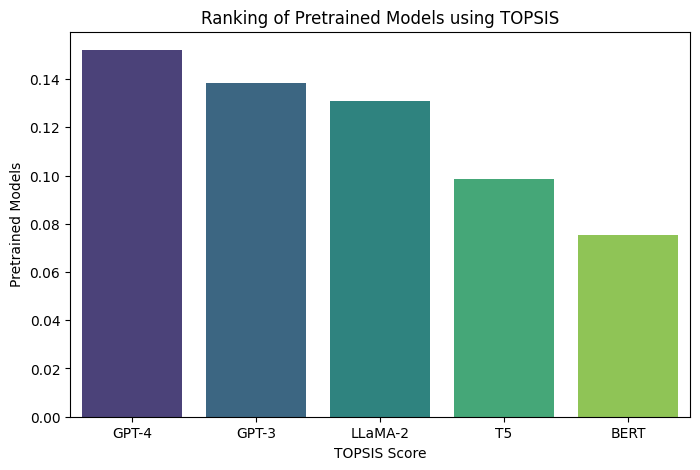

In [62]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df.index, y=df['TOPSIS Score'], palette='viridis')
plt.xlabel('TOPSIS Score')
plt.ylabel('Pretrained Models')
plt.title('Ranking of Pretrained Models using TOPSIS')
plt.show()